In [94]:
import pandas as pd

In [95]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [96]:
%matplotlib inline
plt.style.use('ggplot') 

In [97]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [98]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [99]:
# Get length of stay from the icustays table
query = \
"""
select diagnosis, count(distinct(p.subject_id)) as mortality_count
from mimiciii.admissions a inner join 
mimiciii.patients p on 
p.subject_id = a.subject_id
where dod_hosp is not null
group by diagnosis
order by mortality_count desc
limit 20
"""

data = pd.read_sql_query(query,con)

In [100]:
# Display the first few rows of the data
data.head(100)

,diagnosis,mortality_count
0,PNEUMONIA,617
1,SEPSIS,480
2,CONGESTIVE HEART FAILURE,384
3,INTRACRANIAL HEMORRHAGE,279
4,GASTROINTESTINAL BLEED,223
5,ALTERED MENTAL STATUS,215
6,FEVER,186
7,ABDOMINAL PAIN,186
8,CHEST PAIN,181
9,HYPOTENSION,170


In [101]:
# Compute nissing values in each column
#data.isnull().mean().sort_values(ascending=False)*100
#avg_los = data.los.median()
#print(avg_los)

#for ind in data.index:
 #  fig, ax = plt.subplots(1,1)
   #fig.set_size_inches(5,5)
   #data.iloc[ind].plot(kind='pie', ax=ax, autopct='%1.1f%%')
   #ax.set_ylabel('')
   #ax.set_xlabel('')

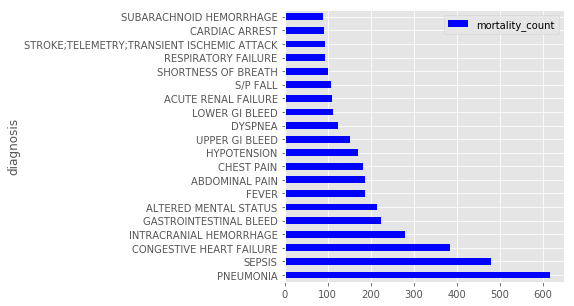

In [102]:
# Plot the distribution

diagnoses = data.set_index('diagnosis').plot.barh(y='mortality_count', figsize=(5, 5), color='blue')

#plot = data.plot.pie(y='admission_count', figsize=(5, 5), legend=False, labels=data.admission_type)

#diagnoses = data.groupby(['admission_type', 'admission_count']).admission_count.count().plot.pie(autopct='%1.1f%%')

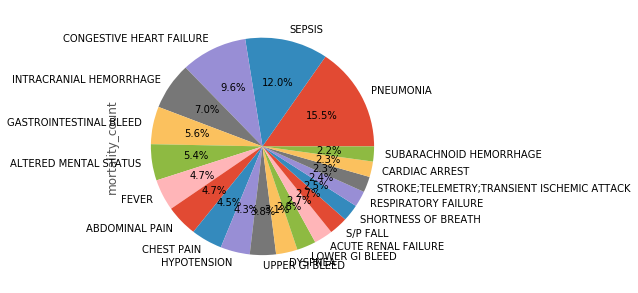

In [103]:
plot = data.plot.pie(y='mortality_count', figsize=(5, 5), legend=False, labels=data.diagnosis, autopct='%1.1f%%')

In [104]:
Total = sum(data.mortality_count)
print Total

3992
